# Rzadkie wektory i macierze

## Zadania
* zaimplementować struktury danych przechowujące rzadkie wektory i macierze (format dowolny)
* zaimplementować podstawowe operacje na wektorach (dodawanie, mnożenie przez skalar, przez wektor)
* zaimplementować podstawowe operacje ma macierzach (dodawanie, mnożenie przez skalar, przez wektor, przez macierz)

In [2]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

#### Rzadkie macierze

In [7]:
def toSparseMatrix(A, x_dim, y_dim, nnz):
    I = np.zeros(dtype=np.int8, shape=(nnz, 1))
    J = np.zeros(dtype=np.int8, shape=(nnz, 1))
    V = np.zeros(shape=(nnz, 1))
    index = 0
    for i in range(x_dim):
        for j in range(y_dim):
            if A[i][j] != 0:
                I[index] = i
                J[index] = j
                V[index] = A[i][j]
                index += 1
    return (I, J, V)


sparse_matrix = np.zeros(shape=(2, 3))
sparse_matrix[0][0] = 5
sparse_matrix[1][2] = 10
toSparseMatrix(A, 2, 3, 2)

(array([[0],
        [1]], dtype=int8), array([[0],
        [2]], dtype=int8), array([[ 5.],
        [10.]]))

#### Rzadkie wektory

In [6]:
def toSparseVector(A, x_dim, nnz):
    I = np.zeros(dtype=np.int8, shape=(nnz, 1))
    V = np.zeros(shape=(nnz, 1))
    index = 0
    for i in range(x_dim):
        if A[i] != 0:
            I[index] = i
            V[index] = A[i]
            index += 1
    return (I, V)

sparse_vector = np.zeros(shape=(4, 1))
sparse_vector[0] = 5
sparse_vector[1] = 10
toSparseVector(sparse_vector, 4, 2)

(array([[0],
        [1]], dtype=int8), array([[ 5.],
        [10.]]))

#### Mnożenie macierzy przez skalar

In [10]:
def multiplyMatrixSparseByScalar(A, nnz, scalar):
    (I, J, V) = A
    for i in range(nnz):
        V[i] *= scalar
    return (I, J, V)

sparse_matrix = np.zeros(shape=(2, 3), dtype=np.float64)
sparse_matrix[0][0] = 5
sparse_matrix[1][2] = 10
multiplyMatrixSparseByScalar(toSparseMatrix(A, 2, 3, 2), 2, 2)

(array([[0],
        [1]], dtype=int8), array([[0],
        [2]], dtype=int8), array([[10.],
        [20.]]))

#### Mnożenie wektor przez skalar

In [12]:
def multiplyVectorSparseByScalar(A, nnz, scalar):
    (I, V) = A
    for i in range(nnz):
        V[i] *= scalar
    return (I, V)

sparse_vector = np.zeros(shape=(4, 1), dtype=np.float64)
sparse_vector[0] = 5
sparse_vector[1] = 10
multiplyVectorSparseByScalar(toSparseVector(sparse_vector, 4, 2), 2, 2)

(array([[0],
        [1]], dtype=int8), array([[10.],
        [20.]]))

# Iteracyjne rozwiązywanie układów równań liniowych

## Zadania:
* zadanie wstępne: zaimplementować [metodę Netwona](https://en.wikipedia.org/wiki/Newton%27s_method) znajdywania zer funkcji rzeczywistych
* zaimplementować dowolną metodę iteracyjną rozwiązywania układów równań liniowych
* przetestować powyższą metodę dla wygenerowanych macierzy (2x2, 3x3, 4x4) i sprawdzić jej poprawność
* sprawdzić, jak liczba iteracji wpływa na dokładność wyniku (wykres jest bardzo dogodną reprezentacją tego wyniku)
* (*) porównać zbieżność metod: Jacobiego, Gaussa-Seidla, SOR i Conjugate Gradient

In [18]:
def newton(f, fp, x):
    x_new = x
    x_old = float('inf')
    fn = f(x_new)
    fo = float('inf')
    eps = 1e-14
    ctr = 1
    while ctr < 100 and abs(x_new - x_old) > eps and (abs(fn - fo) > eps):
        x = x_new - f(x_new)/fp(x_new)
        x_old = x_new
        x_new = x
        fo = fn
        fn = f(x_new)
        ctr += 1
    if ctr == 100:
        raise ValueError('Failed to converge')
    return (x_new, ctr)

f = lambda x: x**2 - 1
fp = lambda x: x * 2
newton(f, fp, 4.4)

(1.0, 9)

In [3]:
def jacobi(A, b, n, it, x = None):
    if x is None:
        x = np.zeros(A.shape[0])
    
    D = np.diag(A)
    R = A - np.diagflat(D)
    
    for i in range(it):
        x = (b - np.dot(R, x)) / D
    return x

n = 3
A = np.zeros(shape=(n, n))
b = np.zeros(n)
A[0][0] = 2
A[0][1] = -1
A[1][0] = -1
A[1][1] = 3
A[1][2] = -1
A[2][1] = -1
A[2][2] = 2
b[0] = 1
b[1] = 8
b[2] -5
jacobi(A, b, n, 10000)

array([2.625, 4.25 , 2.125])

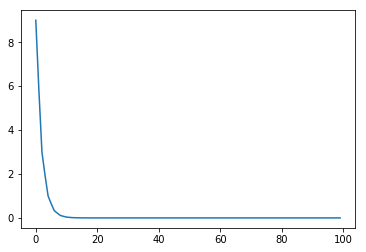

In [6]:
n = 3
A = np.zeros(shape=(n, n))
b = np.zeros(n)
A[0][0] = 2
A[0][1] = -1
A[1][0] = -1
A[1][1] = 3
A[1][2] = -1
A[2][1] = -1
A[2][2] = 2
b[0] = 1
b[1] = 8
b[2] -5

measurements = np.zeros(100)

solution = np.array([2.625, 4.25, 2.125])

for i in range(100):
    result = jacobi(A, b, n, i)
    A[0][0] = 2
    A[0][1] = -1
    A[1][0] = -1
    A[1][1] = 3
    A[1][2] = -1
    A[2][1] = -1
    A[2][2] = 2
    error = 0
    for j in range(3):
        error = error + abs(result[j] - solution[j])
    measurements[i] = error

x = [i for i in range(100)]
plt.plot(x, measurements)